## Benchmark Visualization with Pandas

> Please be sure to leave a reference when using code or taking ideas in my visualizations.

This notebook is an introduction to how to neatly visualize benchmarks on Jupyter using Pandas.

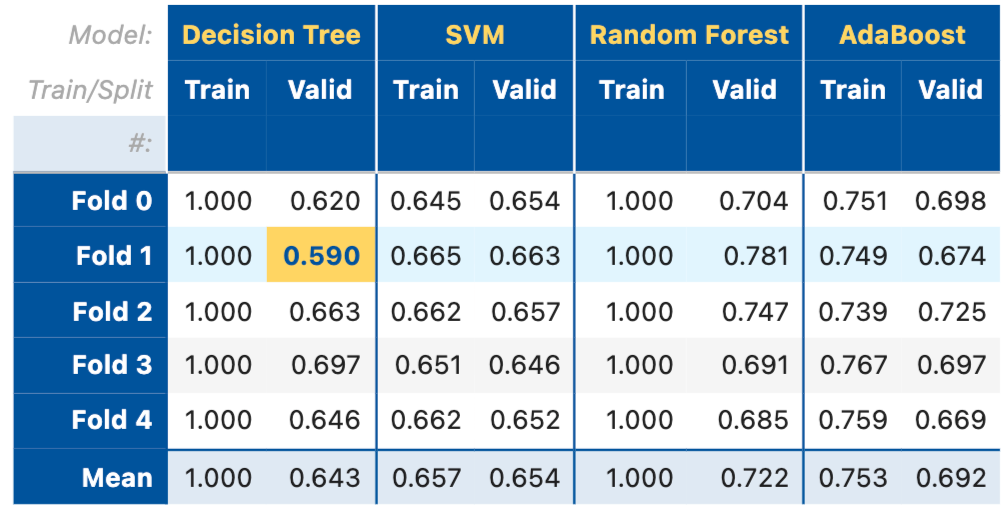

**To become an expressive data scientist.**

### Reference

- [Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

## 0. Preprocessing



In [1]:
import numpy as np 
import pandas as pd

print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)

numpy version :  1.19.5
pandas version :  1.2.4


For fast implementation, only 1000 random data were used.

In [2]:
train = pd.read_csv('../input/tabular-playground-series-nov-2021/train.csv').sample(1000)

In [3]:
target = train['target']

train = train.drop(['target'], axis=1)

## 1. K-Fold Benchmark Visualization

### 1-1. Result

Let's create a total of 4 models.

For demonstration, I used Decistion Tree, SVM, RandomForest, AdaBoost.

The score is RMSE.

In [4]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


def train_model(model_cls, X, y):
    model = model_cls() 
    train_scores, valid_scores = [], []
    
    skf = KFold(n_splits=5, shuffle=True)

    for tr_idx, va_idx in skf.split(X, y):
        X_train, X_val = X.iloc[tr_idx], X.iloc[va_idx]
        y_train, y_val = y[tr_idx], y[va_idx]
        model.fit(X_train, y_train)
        
        pred = model.predict(X_train)
        train_score = roc_auc_score(y_train, pred)
        
        pred = model.predict(X_val)
        valid_score = roc_auc_score(y_val, pred)
        
        train_scores.append(train_score)    
        valid_scores.append(valid_score)
        
    
    print('train score mean : ',np.mean(train_scores))
    print('valid score mean : ',np.mean(valid_scores))
    return train_scores, valid_scores

Save the result as:

In [5]:
dt_train, dt_val = train_model(DecisionTreeRegressor, train, target.values)
svm_train, svm_val = train_model(SVR, train, target.values)
rf_train, rf_val = train_model(RandomForestRegressor, train, target.values)
ada_train, ada_val = train_model(AdaBoostRegressor, train, target.values)

train score mean :  1.0
valid score mean :  0.5250065994027984
train score mean :  0.5607800186304124
valid score mean :  0.530618731888971
train score mean :  1.0
valid score mean :  0.6200280470786603
train score mean :  0.7473453830890434
valid score mean :  0.5342684466205302


### 1-2. Raw Data -> DataFrame

The result is bundled using numpy's stack and overlaid with a DataFrame.

In [6]:
raw_data = np.vstack([dt_train, dt_val,
           svm_train, svm_val,
           rf_train, rf_val,
           ada_train, ada_val]).T

raw_data = np.vstack([raw_data, raw_data.mean(axis=0)])
print(raw_data)

[[1.         0.49469788 0.56365387 0.51809524 1.         0.63495398
  0.78567857 0.52082497]
 [1.         0.52562306 0.55155345 0.48994095 1.         0.60259233
  0.75244694 0.60225   ]
 [1.         0.5518797  0.56771605 0.52675268 1.         0.64410612
  0.83128251 0.5617222 ]
 [1.         0.48913043 0.56243906 0.52864583 1.         0.61029042
  0.63919888 0.47458647]
 [1.         0.56370192 0.55853767 0.58965897 1.         0.60819738
  0.72812002 0.5119586 ]
 [1.         0.5250066  0.56078002 0.53061873 1.         0.62002805
  0.74734538 0.53426845]]


Creates a groupby type DataFrame using MultipleIndex of DataFrame.

In [7]:
df = pd.DataFrame(raw_data,
                  index=pd.Index([f'Fold {idx}' for idx in range(5)]+['Mean'], name='#:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'SVM', 'Random Forest', 'AdaBoost'],
                                                      ['Train', 'Valid']], 
                                                     names=['Model:', 'Train/Split']))
display(df)
s = df.style.format('{:.3f}')


Model:      Decision Tree                 SVM           Random Forest  \
Train/Split         Train     Valid     Train     Valid         Train   
#:                                                                      
Fold 0                1.0  0.494698  0.563654  0.518095           1.0   
Fold 1                1.0  0.525623  0.551553  0.489941           1.0   
Fold 2                1.0  0.551880  0.567716  0.526753           1.0   
Fold 3                1.0  0.489130  0.562439  0.528646           1.0   
Fold 4                1.0  0.563702  0.558538  0.589659           1.0   
Mean                  1.0  0.525007  0.560780  0.530619           1.0   

Model:                 AdaBoost            
Train/Split     Valid     Train     Valid  
#:                                         
Fold 0       0.634954  0.785679  0.520825  
Fold 1       0.602592  0.752447  0.602250  
Fold 2       0.644106  0.831283  0.561722  
Fold 3       0.610290  0.639199  0.474586  
Fold 4       0.608197  0.728120  0.511959  
Mean         0.620028  0.747345  0.534268

### 1-3. Design with CSS

From here, you will need some web development knowledge.

Largely, you need to decorate the css of td, tr, and th tags.

- `th` : each table header
- `tr` : each table row
- `td` : each cell

I used some more css knowledge here, please refer to the links below.

### Further Reading

You can learn html/css with the following text.

- [HTML Tables](https://www.w3schools.com/html/html_tables.asp)
- [CSS :hover Selector](https://www.w3schools.com/csSref/sel_hover.asp)
- [CSS :first-child Selector](https://www.w3schools.com/cssref/sel_firstchild.asp)
- [CSS :last-child Selector](https://www.w3schools.com/cssref/sel_last-child.asp)


In [8]:
# Color Reference: https://2colors.colorion.co/
main_color = '#00539C'
sub_color = '#FFD662'

# Cell
cell_hover = {
    'selector': 'td:hover',
    'props': [('background-color', sub_color),
              ('color', main_color),
              ('font-weight', 'bold')
             ]
}

# Index Explaination
index_names = {
    'selector': '.index_name',
    'props': [('font-style', 'italic'), 
              ('color', 'darkgrey'),  
              ('font-weight', 'normal')]
}

# header
headers = {
    'selector': 'th:not(.index_name)',
    'props': [('background-color', main_color),
              ('color', 'white')]
}

headers_head = {
    'selector': 'th.col_heading', 
    'props': [('text-align', 'center')]
}

# border
border_head1 = {
    'selector': 'th.col_heading.level0', 
    'props': [
        ('font-weight', 'bold'),
        ('color', sub_color),
        ('border-left', '1px solid white'),
    
    ]
}

border_head2 = {
    'selector': 'th:nth-child(2n+2)', 
    'props': [('border-left', '1px solid white')]
}

border_body = {
    'selector': 'td:nth-child(2n+2)', 
    'props': [('border-left', f'1px solid {main_color}')]
}

border_footer1 = {
    'selector': 'tr:last-child td', 
    'props': [('border-top', f'1px solid {main_color}')]
}

border_footer2 = {
    'selector': 'tr:last-child td', 
    'props': [('border-top', f'1px solid {main_color}')]
}

border_footer3 = {
    'selector': 'tr:last-child', 
    'props': [('background-color', main_color+'20')]
}

### 1-4. Apply Styles

Styles can be applied with set_table_styles and passed as a list.

In [9]:
s =s.set_table_styles([cell_hover, index_names, headers, headers_head, 
                    border_head1, border_head2, border_body, 
                    border_footer1, border_footer2, border_footer3])
s

### 1-5. Add Caption (Figure Discription)

You can also add descriptive text below.

In [10]:
s = s.set_caption("Benchmark Result(DT, SVM, RF, ADA)")\
 .set_table_styles([{
     'selector': 'caption',
     'props': [('caption-side', 'bottom'),
               ('color', 'gray'),
              ]
 }], overwrite=False)

s

### 1-6. Export as HTML (or Excel)

`.render()` method to extract it to html.

In [11]:
print(s.render())

<style  type="text/css" >
    #T_ef6dd_ td:hover {
          background-color: #FFD662;
          color: #00539C;
          font-weight: bold;
    }    #T_ef6dd_ .index_name {
          font-style: italic;
          color: darkgrey;
          font-weight: normal;
    }    #T_ef6dd_ th:not(.index_name) {
          background-color: #00539C;
          color: white;
    }    #T_ef6dd_ th.col_heading {
          text-align: center;
    }    #T_ef6dd_ th.col_heading.level0 {
          font-weight: bold;
          color: #FFD662;
          border-left: 1px solid white;
    }    #T_ef6dd_ th:nth-child(2n+2) {
          border-left: 1px solid white;
    }    #T_ef6dd_ td:nth-child(2n+2) {
          border-left: 1px solid #00539C;
    }    #T_ef6dd_ tr:last-child td {
          border-top: 1px solid #00539C;
    }    #T_ef6dd_ tr:last-child td {
          border-top: 1px solid #00539C;
    }    #T_ef6dd_ tr:last-child {
          background-color: #00539C20;
    }    #T_ef6dd_ caption {
       